In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Data Exploration

## Read the data

In [2]:
tr_path = 'train.csv'
test_path = 'test.csv'
data = pd.read_csv(tr_path)

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 81)

In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Visualization

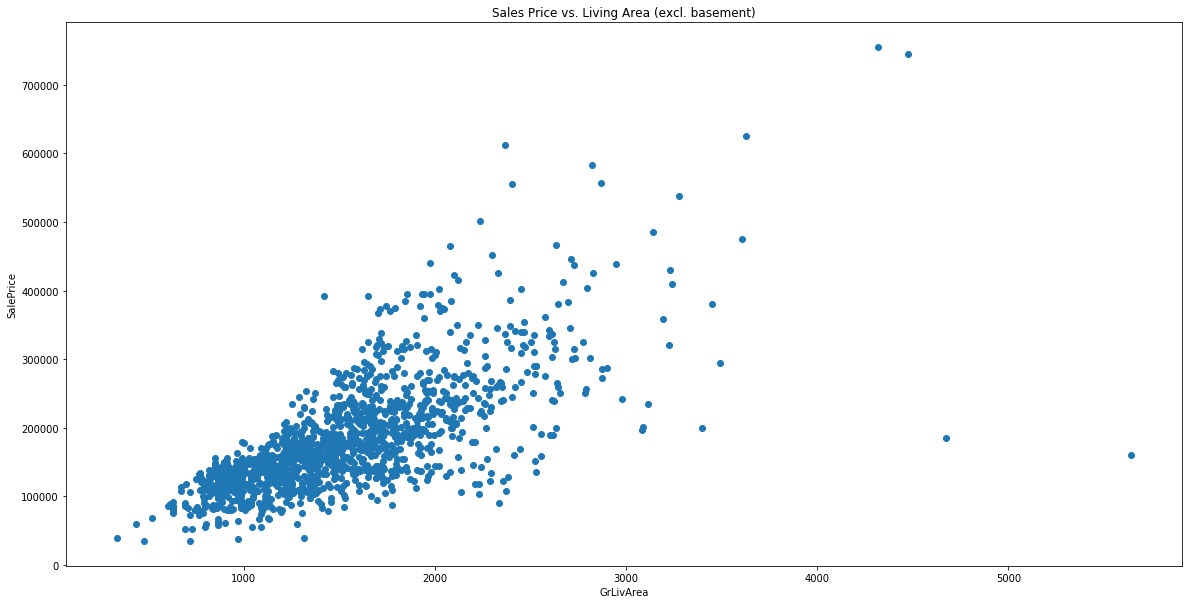

In [6]:
Y = data['SalePrice']
X = data['GrLivArea']

plt.scatter(X, Y, marker = "o")
plt.title('Sales Price vs. Living Area (excl. basement)')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice");
plt.savefig('Sales Price vs. Living Area.pdf')

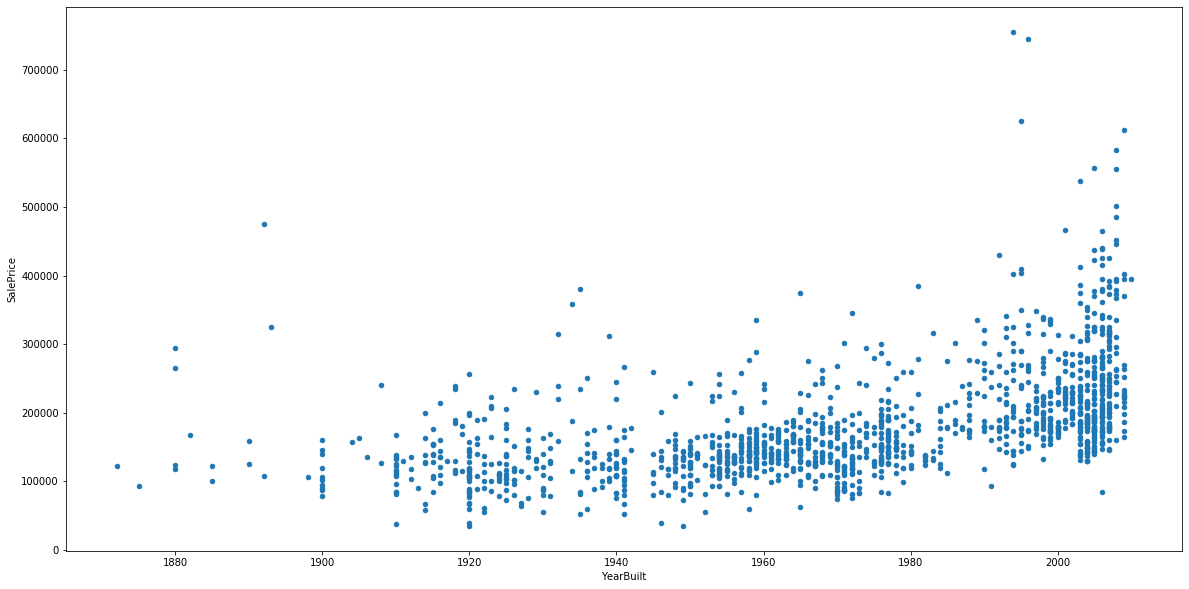

In [7]:
data.plot('YearBuilt', 'SalePrice', kind = 'scatter', marker = 'o');
plt.savefig('YearBuilt vs. SalePrice.pdf')

# Correlation Matrix

In [8]:
corr = data.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


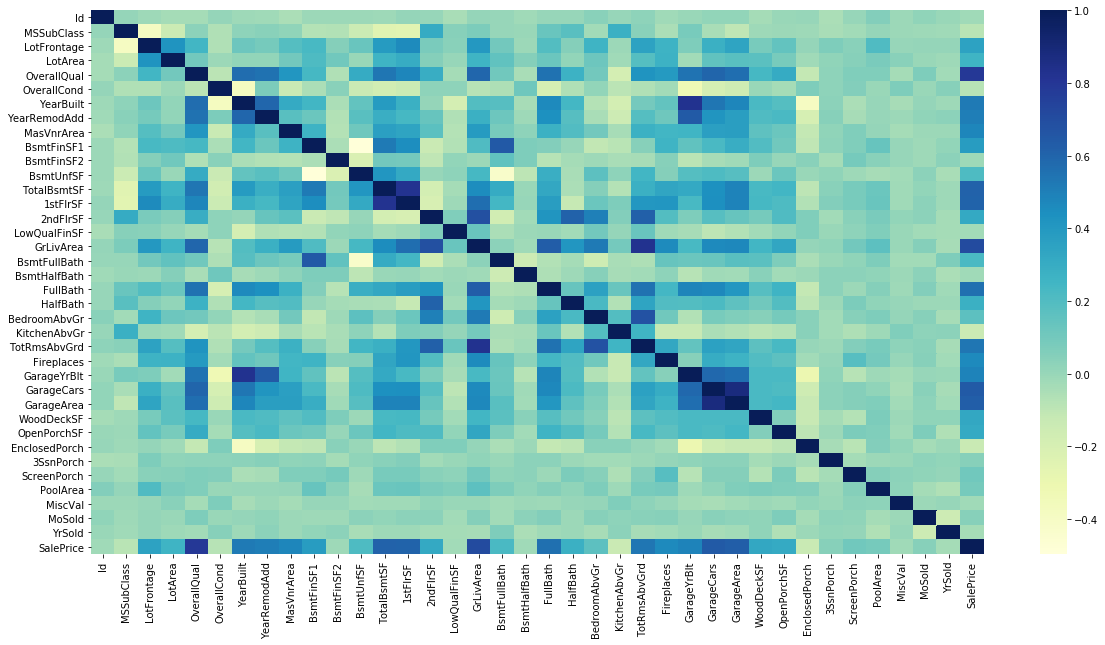

In [9]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="YlGnBu")

## Select features based on correlation

In [10]:
def select_columns(data_frame, column_names):

    sub_df = data_frame[column_names]
    return sub_df

def select_corr_columns(data_frame):
    
    columns = []
    for i in range(data.corr()['SalePrice'].shape[0]):
        if(data.corr()['SalePrice'][i] >= 0.5):
            columns.append(data.corr()['SalePrice'].index[i])

    columns.remove('SalePrice')
    columns
    
    return columns

def subset_data(data_frame):
    return data[select_corr_columns(data_frame)]

select_corr_columns(data)

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

Any column with label in the above list is correlated with the 'SalePrice' column

## Subset data with selected features

In [11]:
subset_data(data)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,7,2003,2003,856,856,1710,2,8,2,548
1,6,1976,1976,1262,1262,1262,2,6,2,460
2,7,2001,2002,920,920,1786,2,6,2,608
3,7,1915,1970,756,961,1717,1,7,3,642
4,8,2000,2000,1145,1145,2198,2,9,3,836
...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460
1456,6,1978,1988,1542,2073,2073,2,7,2,500
1457,7,1941,2006,1152,1188,2340,2,9,1,252
1458,5,1950,1996,1078,1078,1078,1,5,1,240


## Subset data by value

In [12]:
def column_cutoff(data_frame, cutoffs):
    data_subset = data_frame
    
    for column_limits in cutoffs:
        data_subset = data_subset.loc[data_subset[column_limits[0]] >= column_limits[1],:]
        data_subset = data_subset.loc[data_subset[column_limits[0]] <= column_limits[2],:]
    return data_subset

# Linear Regression - Least Squares

We use the following function $$w_{LS} = (X^T X)^{−1}X^T y$$

In [13]:
def least_squares_weights(input_x, target_y):
   
    if input_x.shape[0] < input_x.shape[1]:
        input_x = np.transpose(input_x)
    if target_y.shape[0] < target_y.shape[1]:
        target_y = np.transpose(target_y)
        
    ones = np.ones((len(target_y), 1), dtype=int)
    augmented_x = np.concatenate((ones, input_x), axis=1)

    left_multiplier = np.matmul(np.linalg.inv(np.matmul(np.transpose(augmented_x),
    augmented_x)),np.transpose(augmented_x))
    w_ls = np.matmul(left_multiplier, target_y)
    
    return w_ls.reshape(w_ls.shape[0])

# Predictors

We will use for this example the predictors only two of the correlated columns

In [14]:
df = pd.read_csv('train.csv')
df_sub = select_columns(df, ['SalePrice', 'GrLivArea', 'YearBuilt'])

## GrLivArea 

In [15]:
cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
df_sub_cutoff = column_cutoff(df_sub, cutoffs)

X = df_sub_cutoff['GrLivArea'].values
Y = df_sub_cutoff['SalePrice'].values

training_y = np.array([Y])
training_x = np.array([X])

weights_ls = least_squares_weights(training_x, training_y)
weights_ls

array([13454.06670576,   110.78992341])

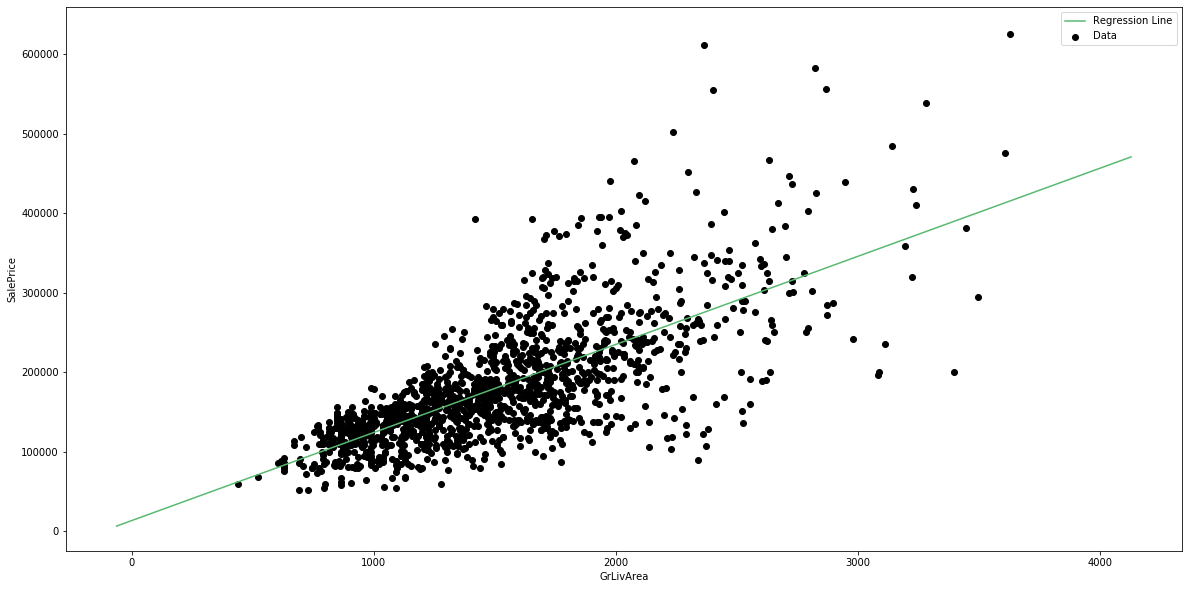

In [17]:
max_X = np.max(X) + 500
min_X = np.min(X) - 500

reg_x = np.linspace(min_X, max_X, 1000)

reg_y = weights_ls[0] + weights_ls[1] * reg_x

plt.plot(reg_x, reg_y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='k', label='Data')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()

In [19]:
print("Wls Intercept:", weights_ls[0])
print("Wls Coefficient:", weights_ls[1])

Wls Intercept: 13454.066705758381
Wls Coefficient: 110.78992340775524


# Sklearn Least Squares Implementation

In [20]:
lr = LinearRegression()

# sklearn dimensional adjustment
skl_X = df_sub_cutoff[['GrLivArea']]
skl_Y = df_sub_cutoff['SalePrice']

lr.fit(skl_X,skl_Y)

print("Sk Intercept:", lr.intercept_)
print("Sk Coefficient:", lr.coef_[0])

Sk Intercept: 13454.066705758654
Sk Coefficient: 110.78992340775513


## Model Evaluation

### RMSE 

In [31]:
def RMSE(X, Y, weights):

    rmse = 0

    b0 = weights[0]
    b1 = weights[1]

    for i in range(len(Y)):
        y_pred = b0 + b1 * X[i]
        rmse += (Y[i] - y_pred) ** 2
    rmse = np.sqrt(rmse/len(Y))

    return rmse

In [32]:
RMSE(X, Y, weights_ls)

53092.48486948662

### $R^2$

In [37]:
def R2(X, Y):
    
    ss_t = 0
    ss_r = 0

    mean_y = np.mean(Y)

    for i in range(len(Y)):
        y_pred = weights_ls[0] + weights_ls[1] * X[i]
        ss_t += (Y[i] - mean_y) ** 2
        ss_r += (Y[i] - y_pred) ** 2
        
    r2 = 1 - (ss_r/ss_t)

    return r2

In [38]:
R2(X,Y)

0.5163484562864966

# Linear Regression - Ridge Regression

Ridge Regression model overcomes the weaknesses of Least Squares

## Preprocessing
It is important to mean-center our target variable and mean-center and standardize observations. This model penalizes big coefficients, the below transformations make the coefficients on a similar scale. 
    
### Mean Center Target
$$y_{cent} = y_0 - \bar{y}$$

### Standardize Observations
$$X_{std} = \frac{X_0-\bar{X}}{s_{X}}$$


In [39]:
def standardize(num_list):

    std = np.std(num_list)
    mean = np.mean(num_list)

    num_list_std = [(x-mean)/std for x in num_list]
    return num_list_std

In [40]:
def preprocess_for_regularization(data, y_column_name, x_column_names):
    
    # List of all columns
    columns = x_column_names + [y_column_name]
    
    # Subset dataframe
    data_subset = data[columns].copy() 
    
    # Mean of y and subtract from all y's
    y_mean = np.mean(data[y_column_name])
    data_subset[y_column_name] = data[y_column_name].apply(lambda x: x - y_mean)
    
    # Calc mean and std for every column in x
    # Then apply standardization
    for column in x_column_names:
        mean = np.mean(data[column])
        std = np.std(data[column])
        
        data_subset[column] = data[column].apply(lambda x: (x - mean)/std)
        
    return data_subset

As in the case of Least squares we will predict SalePrice with GRLivArea

In [41]:
data_subset = preprocess_for_regularization(data, 'SalePrice', ['GrLivArea','YearBuilt'])
data_subset.head()

,GrLivArea,YearBuilt,SalePrice
0,0.370333,1.050994,27578.80411
1,-0.482512,0.156734,578.80411
2,0.515013,0.984752,42578.80411
3,0.383659,-1.863632,-40921.19589
4,1.299326,0.951632,69078.80411


## RR Implementation

We use the following function $$w_{RR}=(\lambda+X^TX)^{-1}X^Ty$$  

It is similar to the function used for Least Squares Regression with a slightly different matrix to invert and $\lambda$ is a parameter *we* must set.  




In [42]:
def ridge_regression_weights(input_x, output_y, lambda_param):
    
    # Check X has shape n >= d 
    if input_x.shape[0] < input_x.shape[1]:
        input_x = np.transpose(input_x)
        
    # Column of ones and add it to X 
    ones = np.ones((len(output_y), 1), dtype=int)
    augmented_x = np.concatenate((ones, input_x), axis=1)
    
    # Create square lambda_matrix, with size equal to number of columns in X
    lambda_matrix = lambda_param * np.identity(min(augmented_x.shape))
    
    # Invert (lambda + dot-prod of x and transposed x)
    inv = np.linalg.inv(lambda_matrix + np.matmul(np.transpose(augmented_x), augmented_x))
    # dot-prod of inverted matrix and transposed X
    left_multiplier = np.matmul(inv , np.transpose(augmented_x))
    # dot-prod with the ys
    weights = np.matmul(left_multiplier, output_y)
    
    return weights

## Selecting the $\lambda$ parameter

We must pick a value for $\lambda$. 
Intuitively: small values tend to emulate the results from Least Squares, while large values will reduce the dimensionality of the problem. 

We will look to choose the value of $\lambda$ that minimizes validation error, in this case it will be the value that minimizes the list returned by a function.

In [43]:
def minimize( passed_func):
    
    # Create values to test
    test_vals = list(np.linspace(.1,49.9, 1000))
    
    # Find mean of returned array from function
    ret_vals = [abs(np.mean(passed_func(x))) for x in test_vals]
    
    # Find smallest mean
    min_mean = min(ret_vals)
    
    # Return the test value that creates the smallest mean
    return test_vals[ret_vals.index(min_mean)]

In [44]:
def lambda_search_func(lambda_param):
    
    # Define proprocessed X and y
    df = preprocess_for_regularization(data.head(50),'SalePrice', ['GrLivArea','YearBuilt'])
    
    y_true = df['SalePrice'].values
    X = df[['GrLivArea','YearBuilt']].values
    
    # Calculate Weights then use for predictions
    weights = ridge_regression_weights(X, y_true, lambda_param )
    y_pred = weights[0] + np.matmul(X,weights[1:])
    
    # Calculate Residuals
    resid = y_true - y_pred
    
    return abs(resid)

lambda_selected = minimize(lambda_search_func)
lambda_selected

2.9414414414414414

In [45]:
weights_rr = ridge_regression_weights(data_subset[['GrLivArea','YearBuilt']], data_subset['SalePrice'], lambda_selected)
weights_rr

array([-1.55182533e-11,  4.98999231e+04,  3.15319479e+04])

# Sklearn Ridge Regression Implementation

If we had not preprocessed our data we need a big value of $\lambda$

In [46]:
# lambda eq alpha

# alpha = 0 is equivalent to least-squares regression
lr = LinearRegression()
reg = Ridge(alpha = lambda_selected)
reg0 = Ridge(alpha = 0)

for m, name in zip([lr, reg, reg0], ["LeastSquares","Ridge Lambda = 2.9414414414414414","Ridge, Lambda = 0"]):
    
    m.fit(data[['GrLivArea','YearBuilt']], data['SalePrice'])
    print(name, "Intercept:", m.intercept_, "Coefs:",m.coef_,"\n")

LeastSquares Intercept: -2024976.362585636 Coefs: [  95.16733349 1045.86241944] 

Ridge Lambda = 2.9414414414414414 Intercept: -2024971.663796882 Coefs: [  95.1673603 1045.8600152] 

Ridge, Lambda = 0 Intercept: -2024976.3625856352 Coefs: [  95.16733349 1045.86241944] 

